<a href="https://colab.research.google.com/github/hectorcamachoz/Solucion_de_problemas/blob/main/A1_5_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion de problemas

En esta actividad se utilizaran los distintos metodos de solucion de problemas para tener lo mas limpia posible nuestra base de datos. Ademas, se utilizara el metodo de one hot encoding para el cambio de valores en las variables cualitativas.

**1.** Primero se importara la base de datos llamada Calificaciones.csv

In [63]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Calificaciones.csv')

y = df['G3']
x = df.drop('G3', axis=1)

print(df.head(5))

  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2           0      yes       4   5   5   6
2      GP    F    15               2           3      yes      10   7   8  10
3      GP    F    15               3           0      yes       2  15  14  15
4      GP    F    16               2           0       no       4   6  10  10


**2.** Ahora se reemplazaran las variables cualitativas por cuantitativas, ya sea haciendo rangos y a eso darle valores, o simplemente estableciendo ceros y unos. Se utilizaran las funciones get_dummies de pandas y label encoder de sklearn.preprocessing

In [64]:
df = pd.get_dummies(df, columns=['Escuela', 'Internet'], drop_first = True, dtype=int)

label_encoder = LabelEncoder()
df['Sexo'] = label_encoder.fit_transform(df['Sexo'])
df = df.rename(columns={'Escuela_MS': 'dummyEscuela', 'Internet_yes':'dummyInternet'})

print(df.head(5))

   Sexo  Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  dummyEscuela  \
0     0    18               2           0       6   5   6   6             0   
1     0    17               2           0       4   5   5   6             0   
2     0    15               2           3      10   7   8  10             0   
3     0    15               3           0       2  15  14  15             0   
4     0    16               2           0       4   6  10  10             0   

   dummyInternet  
0              0  
1              1  
2              1  
3              1  
4              0  


**3.** A continuacion se utilizara el metodo de Turkey para identificar valores atipicos en la variable faltas, utilizando un valor de k = 3.


In [65]:
Q1 = df['Faltas'].quantile(0.25)
Q3 = df['Faltas'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
outliers = df[(df['Faltas'] < lower_bound) | (df['Faltas'] > upper_bound)]
print("Valores atipicos en 'Faltas':")
outliers

Valores atipicos en 'Faltas':


,Sexo,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3,dummyEscuela,dummyInternet
74,0,16,2,0,54,11,12,11,0,1
183,0,17,2,0,56,9,9,8,0,1
276,0,18,2,0,75,10,9,9,0,1
307,1,19,1,1,38,8,9,8,0,1
315,0,19,3,1,40,13,11,11,0,1


Los valores atipicos son todos mayores que el limite superiror, en lo personal lo que haria para tratar estos valores es contactar con la escuela o con los que realizaron la base de datos si estos valores son adecuados o posibles. Al no poder hacer eso por el momento, lo que se hara es eliminarlos, y establecer un valor promedio en cada hueco.

In [66]:
outlier_indices = df[(df['Faltas'] < lower_bound) | (df['Faltas'] > upper_bound)].index

prom_faltas = df.loc[~df.index.isin(outlier_indices), 'Faltas'].mean()

df.loc[outlier_indices, 'Faltas'] = prom_faltas.astype(int)
df.loc[outlier_indices]

,Sexo,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3,dummyEscuela,dummyInternet
74,0,16,2,0,5,11,12,11,0,1
183,0,17,2,0,5,9,9,8,0,1
276,0,18,2,0,5,10,9,9,0,1
307,1,19,1,1,5,8,9,8,0,1
315,0,19,3,1,5,13,11,11,0,1


**4.** Ahora, se realizara una matriz de correlacion para encontrar potenciales problemas de colinealidad.

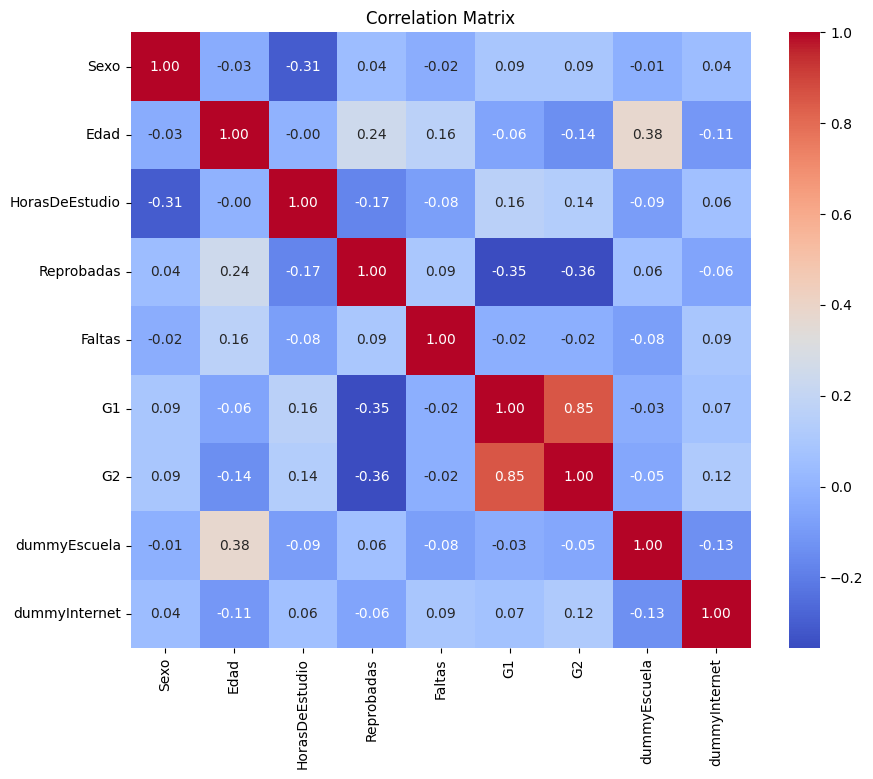

In [67]:

import matplotlib.pyplot as plt

df_corr = df.drop('G3', axis = 1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Al observar el heatmap, se puede concluir que G1 y G2 tienen una correlacion, por lo tanto lo que se hara en el siguiente bloque de codigo es eliminar G1, para asi, evitar las redundancias.

In [68]:
df_dropped = df.drop('G1', axis=1)
print(df_dropped.head())

   Sexo  Edad  HorasDeEstudio  Reprobadas  Faltas  G2  G3  dummyEscuela  \
0     0    18               2           0       6   6   6             0   
1     0    17               2           0       4   5   6             0   
2     0    15               2           3      10   8  10             0   
3     0    15               3           0       2  14  15             0   
4     0    16               2           0       4  10  10             0   

   dummyInternet  
0              0  
1              1  
2              1  
3              1  
4              0  


**5.** En el siguiente bloque se determinaran dos pares de variables que pueden ser consideradas para una interaccion.


In [69]:
df_dropped["HorasReprobadas"] = df_dropped["HorasDeEstudio"] * df_dropped["Reprobadas"]
df_dropped["FaltasReprobadas"] = df_dropped["Faltas"] * df_dropped["Reprobadas"]


# Mostrar las primeras 5 filas con las nuevas columnas
print(df_dropped.head())

   Sexo  Edad  HorasDeEstudio  Reprobadas  Faltas  G2  G3  dummyEscuela  \
0     0    18               2           0       6   6   6             0   
1     0    17               2           0       4   5   6             0   
2     0    15               2           3      10   8  10             0   
3     0    15               3           0       2  14  15             0   
4     0    16               2           0       4  10  10             0   

   dummyInternet  HorasReprobadas  FaltasReprobadas  
0              0                0                 0  
1              1                0                 0  
2              1                6                30  
3              1                0                 0  
4              0                0                 0  


**6.** Para finalizar, se entrenara un modelo de regresion lineal multiple.


(316, 11)
(79, 11)
316 + 79 = 395
R2: 0.8475786320066155


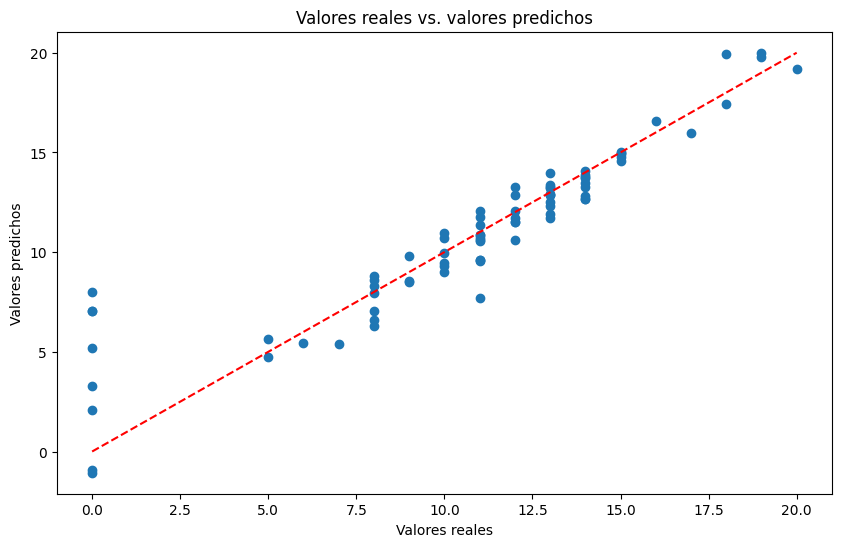

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df_dropped, train_size=0.8, test_size=0.2)
print(train.shape)
print(test.shape)
print(train.shape[0] , '+', test.shape[0] ,'=', int(train.shape[0]) + int(test.shape[0]))

x_train = train.drop('G3', axis = 1)
y_train = train.G3

modelo = LinearRegression()
modelo.fit(x_train, y_train)

x_test = test.drop('G3', axis = 1)
y_test = test.G3

y_pred = modelo.predict(x_test)

print('R2:', r2_score(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. valores predichos')
plt.show()

Al observar el valor de R2 y la grafica podemos decir que un modelo de regresion lineal multiple es bueno para predecir las calificaciones finales.